In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import sklearn as skl
from sklearn import cluster
%pylab inline

Populating the interactive namespace from numpy and matplotlib


read the data in https://github.com/fedhere/DSPS/tree/master/HW10

In [2]:
genes = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS/master/HW10/kidpackgenes.csv')
genes.shape

(4224, 75)

In [3]:
genes = genes.drop(genes.columns[0], axis=1)
genes.shape

(4224, 74)

In [4]:
genes.head()

,1,2,3,4,5,6,7,8,10,11,...,76,77,78,79,81,83,84,85,86,87
0,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,...,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
1,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,...,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
2,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,...,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
3,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,...,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
4,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,...,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477


In [5]:
genes.describe()

,1,2,3,4,5,6,7,8,10,11,...,76,77,78,79,81,83,84,85,86,87
count,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,...,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000
mean,-0.094115,-0.027780,-0.001672,-0.110167,-0.047817,-0.000598,-0.043284,-0.029803,-0.055334,-0.017651,...,-0.033086,-0.050599,-0.023801,-0.042946,0.020522,-0.051150,0.004469,-0.001898,-0.143864,-0.002374
std,0.502677,0.340808,0.328042,0.692851,0.434918,0.348743,0.377675,0.350009,0.477607,0.353382,...,0.482347,0.410243,0.327410,0.354847,0.389799,0.401593,0.479766,0.487669,0.532901,0.346003
min,-2.205219,-1.779857,-3.072872,-3.491640,-2.479485,-2.767680,-1.807954,-1.835609,-3.214822,-2.205530,...,-2.946771,-3.281180,-2.787443,-1.938678,-2.932198,-3.054572,-3.189679,-2.955538,-2.909000,-1.563549
25%,-0.394770,-0.227638,-0.182975,-0.528570,-0.277542,-0.178646,-0.292570,-0.223971,-0.312487,-0.227375,...,-0.315895,-0.298579,-0.191197,-0.259851,-0.207651,-0.259171,-0.242053,-0.264326,-0.441299,-0.210836
50%,-0.069031,-0.016486,-0.014913,-0.046870,-0.018104,0.021162,-0.072925,-0.018363,-0.066373,-0.008910,...,-0.026565,-0.042374,-0.010210,-0.015849,-0.001221,-0.024906,-0.006854,-0.021976,-0.095412,-0.016940
75%,0.235924,0.178946,0.167848,0.376756,0.217731,0.208004,0.168238,0.182520,0.205242,0.195324,...,0.241220,0.200383,0.160373,0.195828,0.226961,0.195206,0.243014,0.237617,0.208726,0.189075
max,2.403599,1.609597,2.357123,1.987768,2.278563,2.106546,1.957411,1.807777,2.719371,3.194689,...,3.058383,1.960692,1.940195,1.352897,2.451836,1.733719,2.586922,3.230761,1.583828,1.694063


# 2 preprocess the data
2.1 whiten the data (scale it) with https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html

In [6]:
scaledgenes = skl.preprocessing.scale(genes)

In [7]:
scaledgenes.mean(0).round(2), scaledgenes.std(0)

(array([ 0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0.,  0.,  0., -0.,  0.,
        -0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0., -0.,
        -0., -0.,  0.,  0., -0.,  0., -0., -0., -0., -0.,  0., -0.,  0.,
        -0., -0.,  0., -0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0.,  0.,
         0.,  0., -0.,  0.,  0., -0.,  0., -0.,  0.,  0., -0.,  0., -0.,
         0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.]))

2.1 use TSNE to make a projection of the data on an optimal 2D plane using https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [8]:
twodproj = skl.manifold.TSNE(n_components=2).fit_transform(scaledgenes)

In [9]:
twodproj.shape

(4224, 2)

2.3 plot the TSNE projection


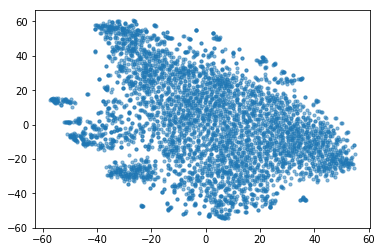

In [11]:
pl.scatter(twodproj[:,0], twodproj[:,1], alpha=0.5, s=10.0)

### Fig: Two dimensional Projection of 87 dimesnional data.

2.4 calculate a function that measures the intracluster variance (i did it in class)

In [12]:
def calICVar(X, labels): # returns intracluster variance
    icvar = 0
    for n in np.unique(labels):
        icvar += np.sum((X[labels == n] - X[labels == n].mean())**2)
        
    return icvar

# 3 K-Means clustering
3.1 cluster the data with K-Means using 1 to 10 clusters. Calculate and plot the intracluster variance as a function of number of clusters and look for an "elbow" in the value of the intracluster variance. What is the optimal number of clusters? discuss

In [13]:
X = scaledgenes
variance = []
for i in range(1, 10):
    k_mean = cluster.k_means(X, i)
    # k_mean[1] would be the labels
    variance.append(calICVar(X, k_mean[1]))

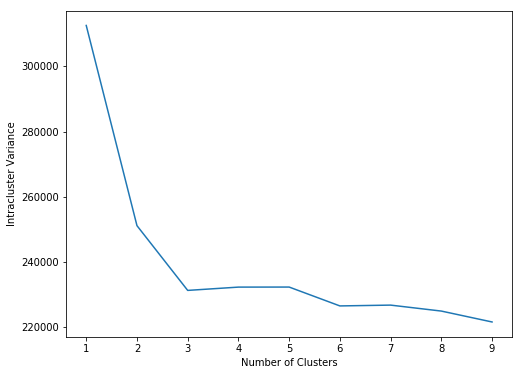

In [14]:
pl.figure(figsize=(8,6))
x=range(1,10)
pl.plot(x, variance)
pl.xlabel('Number of Clusters')
pl.ylabel('Intracluster Variance');

### Fig: Plot of Inracluster variance vs Number of Clusters. The optimal number of cluster are 3. Since it is the the point where the elbow occurs. 

3.2 plot the cluster on the 2D TSNE projection colorcoded by clusters

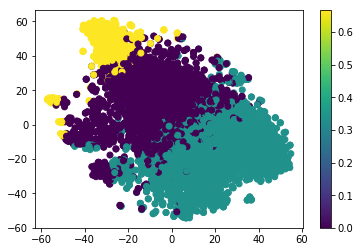

In [15]:
#plots dont need to look exactly like mine
geneclustersKM = cluster.KMeans(n_clusters=3).fit(scaledgenes)

pl.scatter(twodproj[:,0], twodproj[:,1], c=geneclustersKM.labels_/ geneclustersKM.n_clusters)
pl.colorbar();


### Fig: Plot of the three optimal clusters we found above.

# Choose to use DBSCAN or hierarchical clustering (EC also to the other method)

# 4a DBSCAN
4a.1 calculate and plot the distance matrix if you have not yet. Discuss: is there structure?

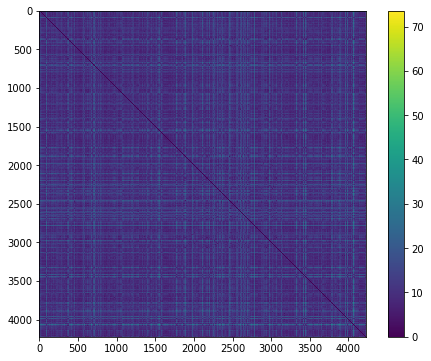

In [16]:
import scipy

SpatialDistance = scipy.spatial.distance.pdist(scaledgenes) ## distance matrix of scaledgenes
Matrix = scipy.spatial.distance.squareform(SpatialDistance) ## convert to square form
pl.figure(figsize=(8,6))
pl.imshow(Matrix)
pl.colorbar();

#### Fig: Plot of distance matrix, a grid structure can be seen from the plot.

4a.2 make a histogram of the pairwise distances. You should choose a value to initialize dbscan that is just below the mean

pairwise distance mean =  11.470978212545768


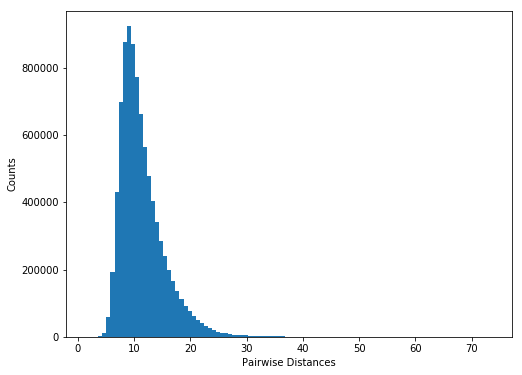

In [17]:
pairwise = scipy.spatial.distance.pdist(scaledgenes) ## Pairwise distances

pl.figure(figsize=(8,6)) 
pl.hist(pairwise, bins=100);
pl.xlabel('Pairwise Distances')
pl.ylabel('Counts');
print("pairwise distance mean = ",pairwise.mean())

#### Fig: Pairwise distances histogram. Mean is 11.5 so we choose 10 as dbscan (density based spatial clustering) initializer.

4a.3 initialize the dbscan eps value appropriately and fit a dbscan model to the data plot the 2D TSNE projection colorcoded as before. 

4a.4 How many clusters do you have, how many outliers? is that a significant number?

In [18]:
## cluster scan packae of sklearn
dbscan = cluster.DBSCAN(eps=5, min_samples=5)
dbscan.fit(scaledgenes)

DBSCAN(algorithm='auto', eps=5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

In [19]:
dbscan.labels_

array([-1, -1, -1, ...,  0,  0, -1])

In [20]:
# To get the unique entries
set(dbscan.labels_)

{-1, 0, 1, 2, 3, 4}

In [21]:
## but we also want to know outliers so we use np.unique
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4]), array([2687, 1507,    5,    7,   11,    7]))

So there are 5 clustersa and 2687 outliers.

# 4b Agglomerative clustering
 4b.1 cluster the data with the ward linkage


In [22]:
### initializing and fitting
aggcluster = cluster.AgglomerativeClustering(linkage='ward')
aggclusterfit = aggcluster.fit(scaledgenes)

4b.2 calculate the linkage and plot the dendrogram of the clusters  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html


In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage

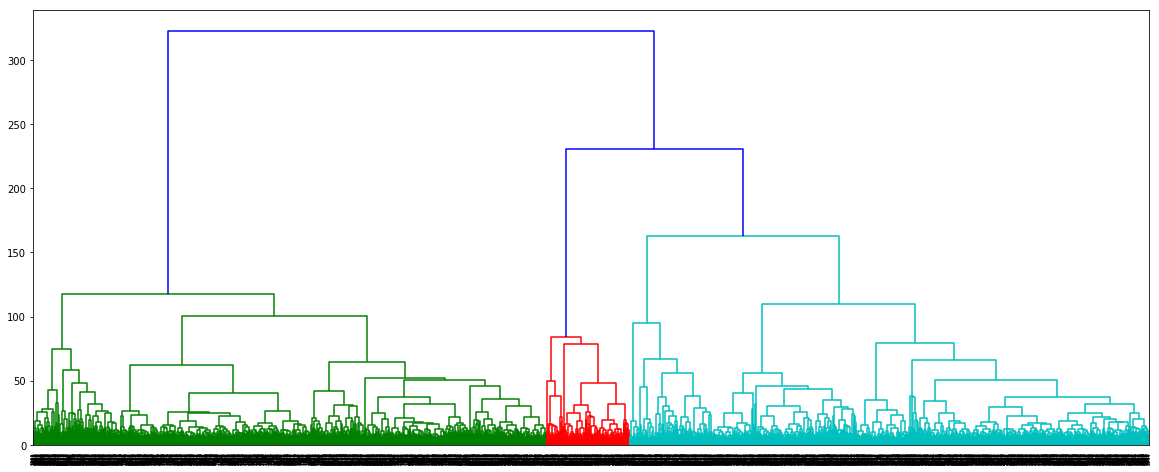

In [24]:
## ward linkage
fig = plt.figure(figsize=(20, 8))
figdnd = dendrogram(linkage(scaledgenes, 'ward'))

#### Fig: Plot of the dendrogram of the clusters for ward linkage.

4b.3 repeat with a different linkage and comment on differences

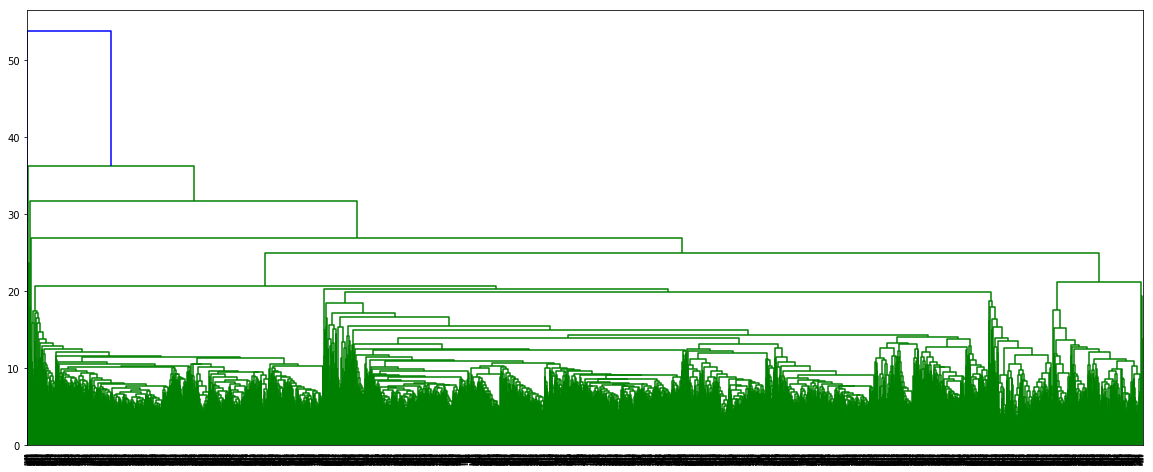

In [25]:
## single linkage did not work and gave error of maximum recursion.
## weighted linkage
fig = plt.figure(figsize=(20, 8))
figdnd = dendrogram(linkage(scaledgenes, 'weighted'))

#### Fig: plot of the dendrogram of the clusters for weighted linkage. 

The ward linkage has three clusters to begin with while the weighted likage had only one cluster. The other linkage did not work as we tried.

4b.4 rerun agglomerative cluatering to get the "ideal" number of clusters as decided by k-means. plot the 2D TSNE projection colorcoded as before.

In [26]:
# The appropriate number of clusters we found were 3 so we will use that
aggcluster = cluster.AgglomerativeClustering(linkage='ward', n_clusters=3)
geneclustersAg = aggcluster.fit(scaledgenes)

In [27]:
geneclustersAg.labels_

array([0, 0, 0, ..., 1, 0, 0])

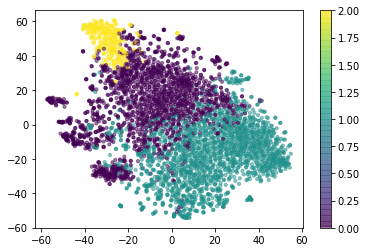

In [28]:
pl.scatter(twodproj[:,0], twodproj[:,1], c=geneclustersAg.labels_, alpha=0.5, s=10)
cbar = pl.colorbar();

#### Fig: AgglomerativeClustering using three cluster which were the appropriate to use as we found above.

# EC, 667: do the other method as well: agglomerative if you used DBSCAn, DBSCAN if you used agglomerative


### We already fit the data with both the methods above. so we can just plot the DBSCAN here.

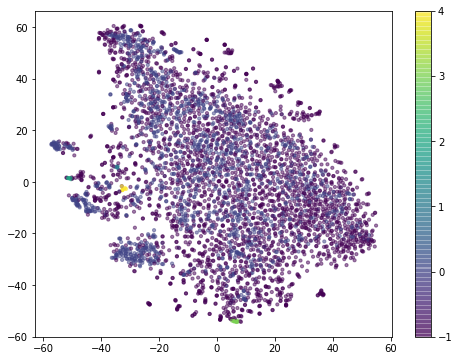

In [29]:
## For DBSCAN
pl.figure(figsize=(8,6))
pl.scatter(twodproj[:,0], twodproj[:,1], c=dbscan.labels_, alpha=0.5, s=10)
cbar = pl.colorbar();

#### Fig: DBSCAN clustring projected on 2D plot.